In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#### Import data (Make sure to parse dates. Consider setting index column to 'date'.)

In [15]:
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates= ['date'], \
    index_col='date')

df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


##### Clean data

In [16]:
df = df[(df['value'] >= df.value.quantile(0.025)) & 
(df['value'] <= df.value.quantile(0.975))]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


##### Draw line plot

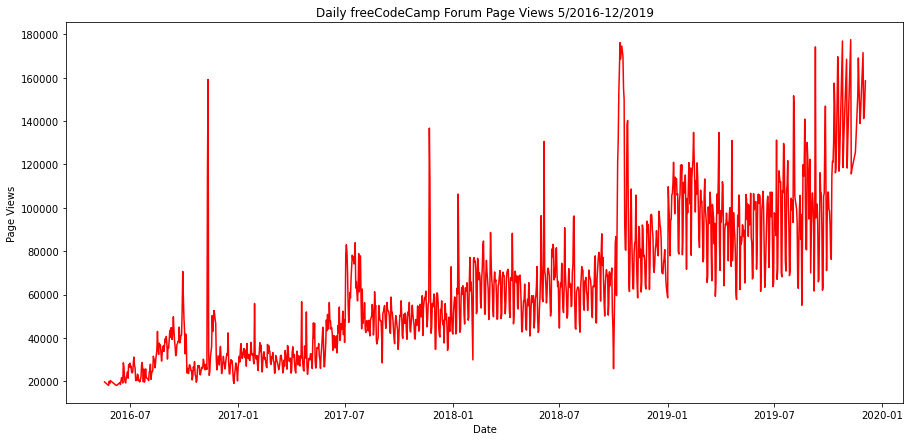

In [37]:
plt.subplots(figsize = (15,7));
plt.plot(df.index,df.value,'r');
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
plt.xlabel("Date")
plt.ylabel("Page Views");

##### Copy and modify data for monthly bar plot